In [72]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import colors
import math

In [73]:
class cell:
    def __init__(self,x,y): 
        self.x = x 
        self.y = y 
        self.blocked = False

def gen_env(p, d): 
    '''Function to generate the enviornment with probability of blockage p and dimension = d x d'''
    temp = grid_param(p, d)
    grid = temp.grid_formation([])
    return grid

class grid_param:
    def __init__(self,p,d):
        self.p = p 
        self.d = d
    def grid_formation(self,matrix):
        '''This function is used to generate the grid. The grid is returned in the form of list of list.'''
        for i in range(self.d): 
            a = [] 
            for j in range(self.d): 
                c = cell(i,j) 
                chance = random.uniform(0,1) 
                if i == 0 and j == 0:
                    a.append(c)
                    continue
                if i == self.d-1 and j == self.d-1: 
                    a.append(c)
                    continue
                if(chance <= self.p):
                    c.blocked = True
                        
                a.append(c) 
            matrix.append(a) 
        return matrix
    
def disp_grid(grid):
    l = []
    for i in range(len(grid)):
        a = []
        for j in range(len(grid)):
            if grid[i][j].blocked:
                a.append('#')
            else:
                a.append(' ')
        l.append(a)
    return l


real_world_grid = gen_env(0.3,101)
maze = disp_grid(real_world_grid)
maze[0][0]='S'
maze[100][100]='G'

In [74]:
disp = np.zeros((101,101))
for i in range(len(maze)):
  for j in range(len(maze[i])):
    if maze[i][j] == '#':
      disp[i][j] = 1
print(disp) #Displays the grid

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
class Node:
    def __init__ (self, r, c, val):
        self.id = str(r) + str(c)
        self.r = r
        self.c = c
        self.val = val
        self.g = float('inf')
        self.h = 0
        self.f = float('inf')
        self.cameFrom = None

In [76]:
def initializeNodes(graph) :
    nodes = []
                                       
    for i, row in enumerate(graph) :
        nodes.append([])
        for j, value in enumerate(row) :
            nodes[i].append(Node(i, j, value))
    
    return nodes

In [77]:
def reconstructPath(goalNode):
    if not goalNode.cameFrom:
        return []

    currentNode = goalNode
    path = []

    while currentNode:
        path.append([currentNode.r, currentNode.c])
        currentNode = currentNode.cameFrom
       
    return path[::-1]

In [78]:
def heuristics(currentNode,goalNode,heur):
    currentRow = currentNode.r
    currentCol = currentNode.c
    goalRow = goalNode.r
    goalCol = goalNode.c
    
    if heur == 'Manhattan':
        Manhattan_distance = abs(currentRow - goalRow) + abs (currentCol - goalCol)
        return Manhattan_distance

In [79]:
def getNeighboringNodes (node, nodes):
    neighbors = []

    numRows = len(nodes)
    numCols = len(nodes[0])
    
    
    row = node.r
    col = node.c
    
    if row < numRows - 1: # DOWN
        neighbors.append(nodes[row + 1][col])
                                       
    if row > 0: # UP
        neighbors.append(nodes[row - 1][col])
                                       
    if col < numCols - 1: # RIGHT
        neighbors.append(nodes[row][col + 1])
                                       
    if col > 0: # LEFT
        neighbors.append(nodes[row][col - 1])
        
    return neighbors

In [80]:
from typing import List


class MinHeap:
    def __init__(self, listP):
        # Holds the position in the heap that each node is at
        self.nodePositionsInHeap = {node.id: idx for idx, node in enumerate (listP)}
        self.heap = self.buildHeap(listP)
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    # O(n) time 0(1) space
    def buildHeap(self, listP) :
        ParentoneIndex = (len (listP) - 2) // 2
        for curr_Index in reversed (range (ParentoneIndex + 1)):
            self.shiftDown (curr_Index, len(listP)- 1, listP)
        return listP
                                       
    def shiftDown(self, curr_Index, endIdx, heap) :
        leftchild_Index = curr_Index * 2 + 1
        while leftchild_Index <= endIdx:
            rightchild_Index = curr_Index * 2 + 2 if curr_Index * 2 + 2 <= endIdx else -1
            if rightchild_Index!=-1 and heap[rightchild_Index].f < heap[leftchild_Index].f:
                idxToSwap = rightchild_Index
            else:
                idxToSwap = leftchild_Index
            if heap[idxToSwap].f<heap[curr_Index].f:
                self.swap(curr_Index, idxToSwap, heap)
                curr_Index = idxToSwap
                leftchild_Index = curr_Index * 2 + 1
            elif heap[idxToSwap].g>heap[curr_Index].g and heap[idxToSwap].f ==heap[curr_Index].f :
                self.swap(curr_Index, idxToSwap, heap)
                curr_Index= idxToSwap
                leftchild_Index = curr_Index * 2 + 1
            else:
                return
                                       
    def shiftUp(self, curr_Index, heap):
        parentIdx = (curr_Index - 1) // 2
        while curr_Index > 0:
          if heap[curr_Index].f < heap[parentIdx].f:
            self.swap(curr_Index, parentIdx, heap)
            curr_Index = parentIdx
            parentIdx = (curr_Index - 1) // 2
          elif heap[curr_Index].f == heap[parentIdx].f and heap[curr_Index].g >heap[parentIdx].g:
              self.swap(curr_Index, parentIdx, heap)
              curr_Index = parentIdx
              parentIdx = (curr_Index - 1) // 2
          else:
            curr_Index = parentIdx
            parentIdx = (curr_Index - 1) // 2
    
    def remove(self):
        self.swap(0,len(self.heap)-1,self.heap)
        node = self.heap.pop()
        del self.nodePositionsInHeap[node.id]
        self.shiftDown(0,len(self.heap)-1,self.heap)
        return node
                                       
    def insert(self, node):
        self.heap.append(node)
        self.nodePositionsInHeap[node.id] = len(self.heap) - 1
        self.shiftUp(len(self.heap) - 1, self.heap)

    def swap(self, i, j, heap) :
        self.nodePositionsInHeap[heap[i].id] = j
        self.nodePositionsInHeap[heap[j].id]=i
        heap[i], heap[j] = heap[j], heap[i]
        
    def containsNode(self, node) :
        return node.id in self.nodePositionsInHeap
    
    def update(self, node):
        self.shiftUp(self.nodePositionsInHeap[node.id],self.heap)

In [81]:
def aStarAlgorithm(startRow, startCol, GoalRow, GoalCol, maze, heur) :
    
    nodes = initializeNodes(maze)
    startNode = nodes[startRow][startCol]
    goalNode = nodes[GoalRow][GoalCol]
    
    
    startNode.g = 0 
    startNode.h = heuristics(startNode,goalNode,heur)
    startNode.f = startNode.g + startNode.h
    
    nodesToVisit = MinHeap([startNode])
    visitedNode = []

    while not nodesToVisit.isEmpty():
        currentMinDistanceNode = nodesToVisit.remove()
        visitedNode.append([currentMinDistanceNode.r, currentMinDistanceNode.c])
        if currentMinDistanceNode == goalNode:
            break
            
        neighbors = getNeighboringNodes(currentMinDistanceNode, nodes)
        for neighbor in neighbors:
            if neighbor.val == '#':
                continue
                
            tenativeDistanceToNeighbor = currentMinDistanceNode.g + 1


            if tenativeDistanceToNeighbor >= neighbor.g:
                continue
            
            neighbor.cameFrom = currentMinDistanceNode
            neighbor.g = tenativeDistanceToNeighbor
            neighbor.f = tenativeDistanceToNeighbor + heuristics(neighbor,goalNode,heur)
        
            if not nodesToVisit.containsNode(neighbor) :
                nodesToVisit.insert(neighbor)
            else:
                nodesToVisit.update(neighbor)
                
    a =  reconstructPath(goalNode)
    return a,visitedNode

In [82]:

a,a_vis = aStarAlgorithm(0,0,100,100,maze,"Manhattan") #Forward A* - Manhattan
c,c_vis = aStarAlgorithm(100,100,0,0,maze,"Manhattan") # Backward A* - Manhattan


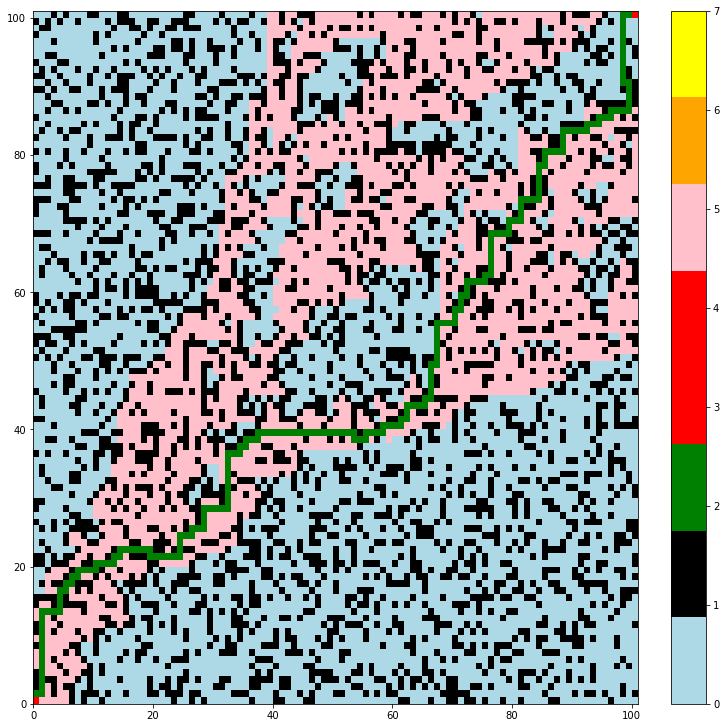

In [83]:
maze_forward = maze
    
for z, row in enumerate(a_vis):
    i = row[0]
    j = row[1]
    maze_forward[i][j] = '++'
    
for z, row in enumerate(a):
    i = row[0]
    j = row[1]
    maze_forward[i][j] = '+'
        
maze_forward[0][0]='S'
maze_forward[100][100]='G'
    
my_dict = {' ': 0, '#': 1, '+':2,'++' :5,'S':3,'G':4}

data1 = []
for i, row in enumerate(maze_forward):
    row = [my_dict[zi] for zi in row]
    data1.append(row)
        
from matplotlib.colors import ListedColormap

def plot_examples(colormaps,data):
    np.random.seed(19680801)
    data = data1
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(10,10), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=7)
        fig.colorbar(psm, ax=ax)
    plt.show()
        
cmap = ListedColormap(["lightblue", "black", "green", "red",'red','pink','orange','yellow'])
plot_examples([cmap],data1)

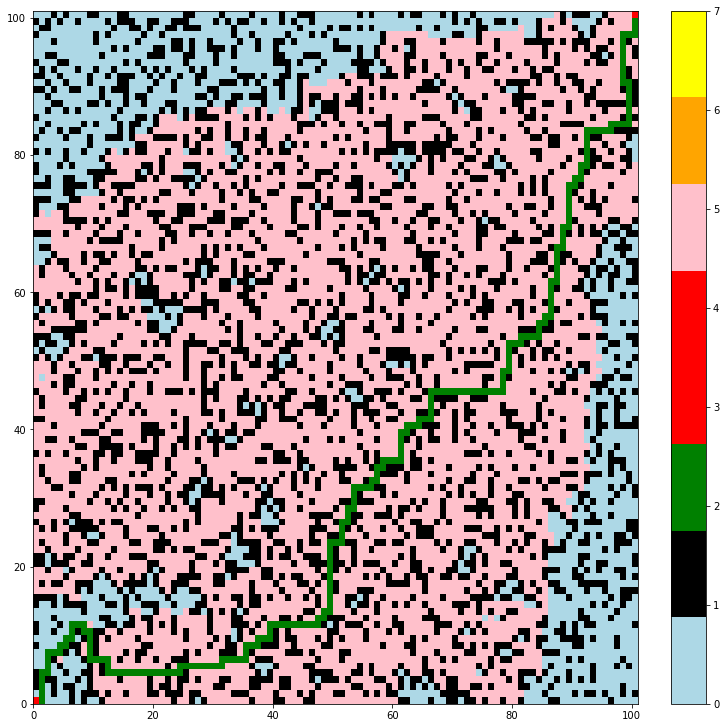

In [84]:
maze_backward = maze
for z, row in enumerate(c_vis):
    i = row[0]
    j = row[1]
    maze_backward[i][j] = '--'

for z, row in enumerate(c):
    i = row[0]
    j = row[1]
    maze_backward[i][j] = '-'
        
maze_backward[0][0]='S'
maze_backward[100][100]='G'
    
my_dict = {' ': 0, '#': 1, '+':0,'++' :0,'S':3,'G':4,'--':5,'-':2}

data1 = []
for i, row in enumerate(maze_backward):
    row = [my_dict[zi] for zi in row]
    data1.append(row)
        
from matplotlib.colors import ListedColormap

def plot_examples(colormaps):
    np.random.seed(19680801)
    data = data1
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(10,10), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=7)
        fig.colorbar(psm, ax=ax)
    plt.show()
        
cmap = ListedColormap(["lightblue", "black", "green", "red",'red','pink','orange','yellow'])
plot_examples([cmap])

In [85]:


def compute_path(r, k, GoalRow, GoalCol,heur):
    nodes2 = initializeNodes(mentalMaze)

    if r == GoalRow and k == GoalCol:
      path = []
      return path
  

    else:
      currentNode = nodes[r][k]
      neighbors = getNeighboringNodes(currentNode, nodes)
      for neighbor in neighbors:
          if neighbor.val == '#':
            mentalMaze[neighbor.r][neighbor.c] = '#'
      path,b = aStarAlgorithm(r, k, GoalRow, GoalCol, mentalMaze, heur)
    return path
    
def AstarAlgo(path) :

  if path == []:

    return 
  
  else:
    for z, row in enumerate(path):
        i = row[0]
        j = row[1]
        

        if i == 100 and j == 100:
          path_repAstar.append([100,100])
          return 

        else:
            if maze[i][j] == '#':
              pos = path_repAstar.pop()
              p1 = compute_path(pos[0],pos[1],100,100,"Manhattan")
              return AstarAlgo(p1)
              

            else:
              path_repAstar.append(path[z])


    return

In [86]:
known_world_grid = gen_env(0,101)
mentalMaze = disp_grid(known_world_grid)
mentalMaze[0][0]='S'
mentalMaze[100][100]='G'

nodes2 = initializeNodes(mentalMaze)
nodes = initializeNodes(maze)
path_repAstar = []

path_intial = compute_path(0,0,100,100,"Manhattan")
AstarAlgo(path_intial)
print(path_repAstar)
print(len(path_repAstar))

[[0, 0], [1, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [14, 2], [13, 2], [13, 3], [13, 4], [14, 4], [15, 4], [16, 4], [16, 5], [17, 5], [17, 6], [18, 6], [18, 7], [19, 7], [20, 7], [21, 7], [21, 8], [22, 8], [23, 8], [22, 8], [22, 9], [22, 10], [22, 11], [23, 11], [23, 12], [24, 12], [25, 12], [26, 12], [27, 12], [28, 12], [27, 12], [27, 13], [27, 14], [28, 14], [27, 14], [27, 15], [27, 16], [28, 16], [29, 16], [30, 16], [31, 16], [32, 16], [32, 17], [33, 17], [34, 17], [34, 18], [34, 17], [34, 16], [35, 16], [36, 16], [36, 15], [37, 15], [38, 15], [39, 15], [40, 15], [41, 15], [42, 15], [43, 15], [43, 16], [44, 16], [45, 16], [45, 17], [46, 17], [47, 17], [47, 18], [47, 19], [48, 19], [47, 19], [47, 20], [47, 21], [48, 21], [49, 21], [48, 21], [48, 22], [48, 23], [49, 23], [50, 23], [51, 23], [52, 23], [53, 23], [53, 24], [54, 24], [54, 25], [55, 25], [56, 25], [56, 26], [56, 27], [55, 27], [55, 28], [55, 2

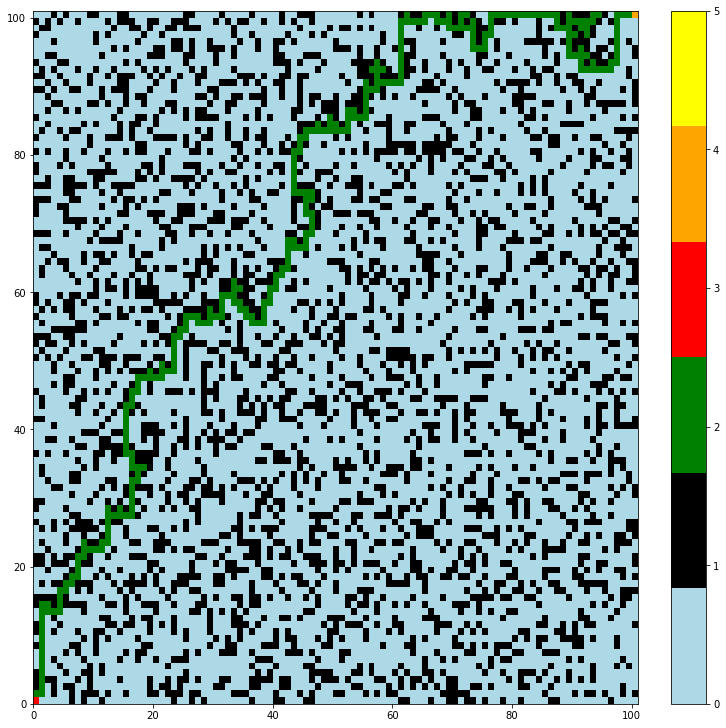

In [87]:
maze_repAstar_forward = maze

for z, row in enumerate(path_repAstar):
    i = row[0]
    j = row[1]
    maze_repAstar_forward[i][j] = '$$'
        
maze_repAstar_forward[0][0]='S'
maze_repAstar_forward[100][100]='G'
    
my_dict = {' ': 0, '#': 1, '+':0,'++' :0,'S':3,'G':4,'**':0,'*':0,'--':0,'-':0,'$$':2}

data1 = []
for i, row in enumerate(maze_backward):
    row = [my_dict[zi] for zi in row]
    data1.append(row)
        
from matplotlib.colors import ListedColormap

def plot_examples(colormaps):
    np.random.seed(19680801)
    data = data1
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(10,10), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=5)
        fig.colorbar(psm, ax=ax)
    plt.show()
        
cmap = ListedColormap(["lightblue", "black", "green", "red", "orange", "yellow"])
plot_examples([cmap])

In [88]:
backward_path = []
def compute_backward_path(r, k, GoalRow, GoalCol,heur):
    nodes2 = initializeNodes(mentalMaze)

    if r == GoalRow and k == GoalCol:
      path = []
      return path
  

    else:
      currentNode = nodes[r][k]
      neighbors = getNeighboringNodes(currentNode, nodes)
      for neighbor in neighbors:
          if neighbor.val == '#':
            mentalMaze[neighbor.r][neighbor.c] = '#'
      path,b = aStarAlgorithm(r, k, GoalRow, GoalCol, mentalMaze, heur)
    return path


def backwardAstarAlgo(path) :

  if path == []:

    return 
  
  else:
    for z, row in enumerate(path):
        i = row[0]
        j = row[1]
        

        if i == 0 and j == 0:
          backward_path.append([0,0])
          return 

        else:
            if maze[i][j] == '#':
              pos = backward_path.pop()
              p1 = compute_path(pos[0],pos[1],0,0,"Manhattan")
              return backwardAstarAlgo(p1)
              

            else:
              backward_path.append(path[z])
 

    return

In [89]:
known_world_grid = gen_env(0,101)
mentalMaze = disp_grid(known_world_grid)
mentalMaze[0][0]='S'
mentalMaze[100][100]='G'


path_backward_initial = compute_path(100,100,0,0,"Manhattan")
backwardAstarAlgo(path_backward_initial)
print(backward_path)
print(len(backward_path))

[[100, 100], [99, 100], [98, 100], [97, 100], [96, 100], [97, 100], [97, 99], [97, 98], [96, 98], [95, 98], [94, 98], [93, 98], [92, 98], [91, 98], [90, 98], [90, 97], [89, 97], [88, 97], [88, 96], [88, 95], [88, 94], [89, 94], [89, 95], [90, 95], [91, 95], [91, 94], [91, 93], [90, 93], [90, 92], [89, 92], [90, 92], [91, 92], [91, 91], [92, 91], [92, 90], [92, 89], [92, 88], [91, 88], [90, 88], [91, 88], [90, 88], [90, 89], [89, 89], [88, 89], [88, 88], [87, 88], [86, 88], [85, 88], [85, 87], [84, 87], [83, 87], [83, 86], [84, 86], [84, 85], [84, 84], [83, 84], [83, 83], [84, 83], [84, 82], [84, 83], [84, 84], [85, 84], [86, 84], [87, 84], [87, 83], [87, 82], [86, 82], [87, 82], [87, 83], [87, 84], [88, 84], [89, 84], [89, 83], [89, 82], [89, 83], [90, 83], [89, 83], [89, 84], [88, 84], [87, 84], [86, 84], [85, 84], [84, 84], [84, 85], [84, 86], [83, 86], [83, 87], [83, 88], [82, 88], [81, 88], [80, 88], [79, 88], [79, 87], [78, 87], [77, 87], [76, 87], [75, 87], [74, 87], [73, 87], [7

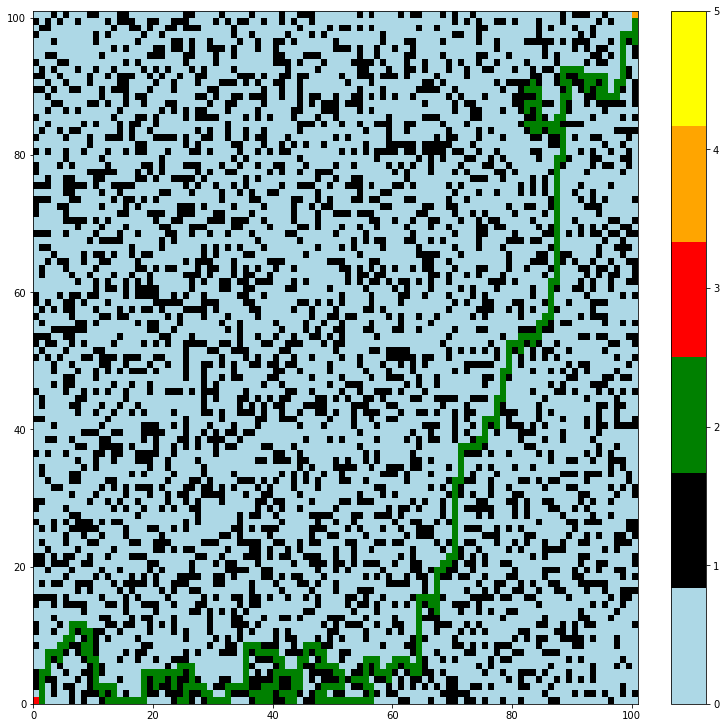

In [90]:
maze_repAstar_backward = maze

for z, row in enumerate(backward_path):
    i = row[0]
    j = row[1]
    maze_repAstar_backward[i][j] = '$$$'
        
maze_repAstar_backward[0][0]='S'
maze_repAstar_backward[100][100]='G'
    
my_dict = {' ': 0, '#': 1, '+':0,'++' :0,'S':3,'G':4,'**':0,'*':0,'--':0,'-':0,'$$':0,'$$$':2}

data1 = []
for i, row in enumerate(maze_repAstar_forward):
    row = [my_dict[zi] for zi in row]
    data1.append(row)
        
from matplotlib.colors import ListedColormap

def plot_examples(colormaps):
    np.random.seed(19680801)
    data = data1
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(10,10), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=5)
        fig.colorbar(psm, ax=ax)
    plt.show()
        
cmap = ListedColormap(["lightblue", "black", "green", "red", "orange", "yellow"])
plot_examples([cmap])

In [91]:
def adaptiveaStarAlgorithm(startRow, startCol, GoalRow, GoalCol, maze, heur,gd) :
    
    nodes = initializeNodes(maze)
    startNode = nodes[startRow][startCol]
    goalNode = nodes[GoalRow][GoalCol]
    
    
    startNode.g = 0 
    startNode.h = heuristics(startNode,goalNode,heur)
    startNode.f = startNode.g + startNode.h
    
    
    nodesToVisit = MinHeap([startNode])
    visitedNode = []

    while not nodesToVisit.isEmpty():
      currentMinDistanceNode = nodesToVisit.remove()
      visitedNode.append([currentMinDistanceNode.r, currentMinDistanceNode.c])
      if currentMinDistanceNode == goalNode:
          break
      neighbors = getNeighboringNodes(currentMinDistanceNode, nodes)
      for neighbor in neighbors:
        if neighbor.val == '#':
            continue
        
        tenativeDistanceToNeighbor = currentMinDistanceNode.g + 1


        if tenativeDistanceToNeighbor >= neighbor.g:
            continue
        
        neighbor.cameFrom = currentMinDistanceNode
        neighbor.g = tenativeDistanceToNeighbor
        neighbor.h = gd - neighbor.g
        neighbor.f = neighbor.h + neighbor.g

        if not nodesToVisit.containsNode(neighbor) :
            nodesToVisit.insert(neighbor)
        else:
            nodesToVisit.update(neighbor)

    a =  reconstructPath(goalNode)
    
    return a

In [92]:
path_astar = []
def compute_path_adaptive(r, k, GoalRow, GoalCol,heur,gd):
    nodes2 = initializeNodes(maze_astar)

    if r == GoalRow and k == GoalCol:
      path = []
      return path
  

    else:
      currentNode = nodes[r][k]

      neighbors = getNeighboringNodes(currentNode, nodes)
      for neighbor in neighbors:
          if neighbor.val == '#':
            maze_astar[neighbor.r][neighbor.c] = '#'

      path = adaptiveaStarAlgorithm(r, k, GoalRow, GoalCol, maze_astar, heur,gd)

    return path

def AstarAlgo_adaptive(path,gd) :

  if path == []:

    return 


  else:
    for z, row in enumerate(path):
        i = row[0]
        j = row[1]
        
        if i == 100 and j == 100:
          path_astar.append([100,100])
          return 

        else:
            if maze[i][j] == '#':
              pos = path_astar.pop()
              p1 = compute_path_adaptive(pos[0],pos[1],100,100,"Manhattan",gd)
              p2 = len(p1)
              return AstarAlgo_adaptive(p1,p2)
              

            else:
              path_astar.append(path[z])
              gd = gd - 1
    return 


In [93]:
known_world_grid = gen_env(0,101)
maze_astar = disp_grid(known_world_grid)
maze_astar[0][0]='S'
maze_astar[100][100]='G'


nodes2 = initializeNodes(maze_astar)
nodes = initializeNodes(maze)
path_astar = []
path_astar_len = []

a, a1 =  aStarAlgorithm(0,0,100,100, maze_astar, "Manhattan")
b = len(a)-1

AstarAlgo_adaptive(a,b)
print(path_astar)

[[0, 0], [1, 0], [0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [1, 2], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [3, 4], [2, 4], [1, 4], [0, 4], [0, 5], [1, 5], [0, 5], [0, 4], [0, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [4, 3], [5, 3], [4, 3], [5, 3], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [13, 2], [12, 2], [11, 2], [10, 2], [9, 2], [8, 2], [7, 2], [6, 2], [5, 2], [4, 2], [4, 3], [4, 4], [3, 4], [2, 4], [1, 4], [0, 4], [0, 3], [0, 2], [1, 2], [2, 2], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [13, 1], [12, 1], [11, 1], [10, 1], [9, 1], [8, 1], [7, 1], [6, 1], [5, 1], [4, 1], [3, 1], [2, 1], [1, 1], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4], [3, 4], [3, 5], [3, 6], [4, 6], [5, 6], [6, 6], [7, 6], [6, 6], [5, 6], [4, 6], [3, 6], [4, 6], [5, 6], [6, 6], [6, 5], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [9, 4], [8, 4], [7, 4], [6, 4], [6, 5], [5, 5], [5, 6], [4, 

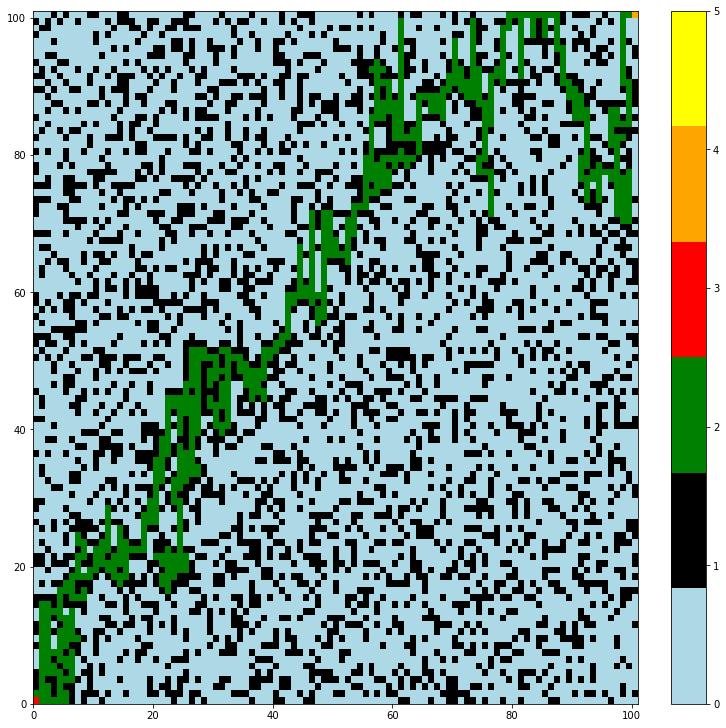

In [94]:
maze_adaptive = maze

for z, row in enumerate(path_astar):
    i = row[0]
    j = row[1]
    maze_adaptive[i][j] = '$$$$'
        
maze_adaptive[0][0]='S'
maze_adaptive[100][100]='G'
    
my_dict = {' ': 0, '#': 1, '+':0,'++' :0,'S':3,'G':4,'**':0,'*':0,'--':0,'-':0,'$$':0,'$$$':0,'$$$$':2}

data1 = []
for i, row in enumerate(maze_repAstar_forward):
    row = [my_dict[zi] for zi in row]
    data1.append(row)
        
from matplotlib.colors import ListedColormap

def plot_examples(colormaps):
    np.random.seed(19680801)
    data = data1
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(10,10), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=5)
        fig.colorbar(psm, ax=ax)
    plt.show()
        
cmap = ListedColormap(["lightblue", "black", "green", "red", "orange", "yellow"])
plot_examples([cmap])

In [95]:
i = 0 
while i <50 :
  real_world_grid = gen_env(0.3,101)
  maze = disp_grid(real_world_grid)
  maze[0][0]='S'
  maze[100][100]='G'

  known_world_grid = gen_env(0,101)
  mentalMaze = disp_grid(known_world_grid)
  mentalMaze[0][0]='S'
  mentalMaze[100][100]='G'

  nodes2 = initializeNodes(mentalMaze)
  nodes = initializeNodes(maze)
  path_repAstar = []

  path_intial = compute_path(0,0,100,100,"Manhattan")
  AstarAlgo(path_intial)
  print(path_repAstar)
  print(len(path_repAstar))

  i = i+1

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 3], [2, 3], [3, 3], [3, 4], [3, 5], [4, 5], [3, 5], [2, 5], [2, 6], [2, 7], [1, 7], [1, 8], [0, 8], [0, 9], [0, 10], [1, 10], [2, 10], [2, 11], [3, 11], [4, 11], [5, 11], [6, 11], [7, 11], [7, 12], [7, 13], [8, 13], [9, 13], [10, 13], [11, 13], [12, 13], [13, 13], [14, 13], [15, 13], [15, 14], [16, 14], [17, 14], [18, 14], [19, 14], [20, 14], [21, 14], [20, 14], [19, 14], [19, 15], [19, 16], [20, 16], [21, 16], [20, 16], [19, 16], [19, 15], [18, 15], [17, 15], [16, 15], [17, 15], [18, 15], [19, 15], [19, 14], [20, 14], [20, 13], [20, 12], [21, 12], [22, 12], [23, 12], [24, 12], [24, 13], [25, 13], [25, 14], [25, 15], [25, 16], [26, 16], [27, 16], [28, 16], [29, 16], [28, 16], [28, 17], [28, 18], [29, 18], [29, 19], [30, 19], [31, 19], [32, 19], [33, 19], [34, 19], [35, 19], [36, 19], [36, 20], [37, 20], [38, 20], [38, 21], [39, 21], [40, 21], [40, 22], [41, 22], [41, 23], [42, 23], [43, 23], [43, 24], [43, 25], [44, 25], [45, 25], [45, 26], [46, 26]

In [96]:
i = 0
while i < 50:
  real_world_grid = gen_env(0.3,101)
  maze = disp_grid(real_world_grid)
  maze[0][0]='S'
  maze[100][100]='G'

  known_world_grid = gen_env(0,101)
  mentalMaze = disp_grid(known_world_grid)
  mentalMaze[0][0]='S'
  mentalMaze[100][100]='G'

  nodes2 = initializeNodes(mentalMaze)
  nodes = initializeNodes(maze)
  backward_path = []

  path_backward_initial = compute_path(100,100,0,0,"Manhattan")
  backwardAstarAlgo(path_backward_initial)
  print(backward_path)
  print(len(backward_path))
i = i+1

[[100, 100], [99, 100], [98, 100], [97, 100], [97, 99], [96, 99], [95, 99], [94, 99], [93, 99], [92, 99], [91, 99], [90, 99], [89, 99], [88, 99], [87, 99], [86, 99], [85, 99], [84, 99], [83, 99], [82, 99], [81, 99], [80, 99], [79, 99], [78, 99], [78, 98], [78, 97], [77, 97], [76, 97], [77, 97], [77, 96], [77, 95], [76, 95], [75, 95], [75, 94], [74, 94], [73, 94], [73, 93], [72, 93], [72, 92], [71, 92], [72, 92], [72, 91], [72, 90], [71, 90], [71, 89], [70, 89], [69, 89], [68, 89], [67, 89], [66, 89], [65, 89], [64, 89], [63, 89], [62, 89], [61, 89], [60, 89], [60, 88], [60, 87], [60, 88], [61, 88], [61, 89], [62, 89], [63, 89], [63, 88], [63, 87], [62, 87], [62, 86], [62, 87], [63, 87], [64, 87], [65, 87], [65, 86], [65, 85], [64, 85], [64, 84], [63, 84], [62, 84], [61, 84], [60, 84], [59, 84], [58, 84], [57, 84], [57, 83], [56, 83], [55, 83], [55, 82], [54, 82], [53, 82], [53, 81], [52, 81], [53, 81], [54, 81], [55, 81], [55, 80], [55, 81], [56, 81], [57, 81], [57, 80], [57, 79], [57,